In [68]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.shape

(891, 12)

In [4]:
test_df= pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
#Check whether a null value present in dataset or not
test_df.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked    False
dtype: bool

### Deal with Missing value

In [6]:
train_df[train_df['Age'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [7]:
age_med =train_df['Age'].median()
train_df['Age'].mean()

29.69911764705882

In [8]:
train_df['Age'].fillna(age_med,inplace=True)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)

In [9]:
train_df[train_df['Cabin'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
train_df.drop(['Cabin'],axis=1,inplace=True)
test_df.drop(['Cabin'],axis=1,inplace=True)
train_df[train_df['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [11]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
pd.DataFrame(train_df.groupby(['Embarked']).count())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644,644,644


In [13]:
train_df['Embarked'].fillna('S',inplace=True)

In [14]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [15]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Embarked       False
dtype: bool

In [16]:
test_df[test_df['Fare'].isnull()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [17]:
test_df['Fare'].median()

14.4542

In [18]:
test_df['Fare'].mean()

35.6271884892086

In [19]:
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

In [20]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


**for building a model we remove "name","Passengerid" from both test and train data because name,Passengerid can't decide survival**

In [21]:
train_df.drop(['Name','PassengerId'],axis=1,inplace=True)
test_df.drop(['Name','PassengerId'],axis=1,inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


**Create a x_train,x_test,y_train,y_test using train and test dataset**

In [61]:
y_test=pd.read_csv('gender_submission (1).csv')
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [62]:
x_train = train_df.drop(['Survived'],axis=1)
y_train = train_df.Survived
x_test = test_df
y_test = y_test.Survived

In [34]:
x_train.shape


(891, 8)

In [35]:
y_train.shape

(891,)

In [32]:
x_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C


**change Categorical data into numerical data because Machine learning model only work on numeric value**

In [75]:

x_train.replace({
    'male':1,
    'female':0
},inplace=True)

In [47]:
x_test.replace({
    'male':1,
    'female':0
},inplace=True)

**The class sklearn.preprocessing.LabelEncoder Encode target labels with value between 0 and n_classes-1.It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.**


In [48]:
from sklearn.preprocessing import LabelEncoder

In [51]:
label = LabelEncoder()
label2=LabelEncoder()

In [76]:
# fit the label into label encoder and then it transform into numerical value
x_train['Ticket']=label.fit_transform(x_train['Ticket'])
x_train['Embarked']=label2.fit_transform(x_train['Embarked'])
x_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,2
1,1,0,38.0,1,0,596,71.2833,0
2,3,0,26.0,0,0,669,7.9250,2
3,1,0,35.0,1,0,49,53.1000,2
4,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,101,13.0000,2
887,1,0,19.0,0,0,14,30.0000,2
888,3,0,28.0,1,2,675,23.4500,2
889,1,1,26.0,0,0,8,30.0000,0


In [53]:
x_test['Ticket']=label.fit_transform(x_test['Ticket'])
x_test['Embarked']=label2.fit_transform(x_test['Embarked'])
x_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.5,0,0,152,7.8292,1
1,3,0,47.0,1,0,221,7.0000,2
2,2,1,62.0,0,0,73,9.6875,1
3,3,1,27.0,0,0,147,8.6625,2
4,3,0,22.0,1,1,138,12.2875,2
...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,267,8.0500,2
414,1,0,39.0,0,0,324,108.9000,0
415,3,1,38.5,0,0,346,7.2500,2
416,3,1,27.0,0,0,220,8.0500,2


**Import LogisticRegression model because survived or not survived is classification problem to build this model we use Logistic Regression**

In [77]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression(max_iter=400)

In [60]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=400)

In [78]:
model.score(x_test,y_test)

0.9282296650717703

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
true_value = y_test;
predicate_value = model.predict(x_test)

In [81]:
cm =confusion_matrix(true_value,predicate_value)
cm


array([[243,  23],
       [  7, 145]], dtype=int64)

Text(33.0, 0.5, 'Predicated value')

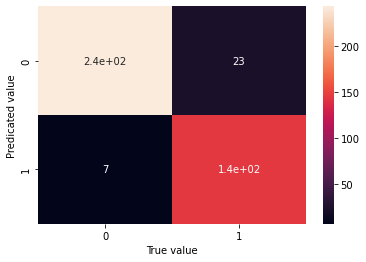

In [82]:
sns.heatmap(cm,annot=True)
plt.xlabel('True value')
plt.ylabel("Predicated value")